In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import sys
import codecs, json 
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import PIL
import numpy as np # linear algebra
import matplotlib.pyplot as plt # Ploting the diagrams

from sklearn.utils import shuffle

import math
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import load_img

import os
from os import listdir
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt # Ploting the diagrams
import matplotlib.image as mpimg


from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from tensorflow.keras import models
import random
from keras.models import model_from_json
import pandas as pd
tf.random.set_seed(333)

In [2]:
model = keras.models.load_model("G3.h5")

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [4]:
shallow = model.get_weights()[:5]
deep = model.get_weights()[5:]

In [5]:
s = 0
d = 0

for i in model.get_weights()[:6]:
    s = s + i.size

for i in model.get_weights()[6:]:
    d = d + i.size
s,d

(56320, 1806465)

In [6]:
d/s

32.07501775568182

In [7]:
deep = [ i.tolist() for i in deep]
shallow = [ i.tolist() for i in shallow]

In [8]:
w = [i.tolist() for i in model.get_weights()]

In [9]:
jd = json.dumps(deep)
js = json.dumps(shallow)
jw = json.dumps(w)

In [10]:
js.__sizeof__(),jd.__sizeof__(),jw.__sizeof__()

(1235822, 40831208, 42066981)

In [11]:
speed = 30.78 * 1000000
jsSize = 1235822*8
jdSize = 40831208*8
jwSize = 42066981*8
jsSize/speed,jdSize/speed,jwSize/speed

(0.3212012995451592, 10.612399740090968, 10.933588304093567)

In [12]:
jw.__sizeof__()/js.__sizeof__()

34.03967642589305

In [13]:
tt = 15.2

In [14]:
clients = np.arange(1,100,2)
syncTime = []
syncSpeed = 10.933
for i in clients:
    syncTime.append(((2*syncSpeed+tt))*i)
syncTime

[37.066,
 111.19800000000001,
 185.33,
 259.462,
 333.59400000000005,
 407.726,
 481.85800000000006,
 555.99,
 630.1220000000001,
 704.254,
 778.3860000000001,
 852.518,
 926.6500000000001,
 1000.782,
 1074.914,
 1149.046,
 1223.178,
 1297.3100000000002,
 1371.442,
 1445.574,
 1519.7060000000001,
 1593.8380000000002,
 1667.97,
 1742.102,
 1816.2340000000002,
 1890.3660000000002,
 1964.498,
 2038.63,
 2112.762,
 2186.8940000000002,
 2261.0260000000003,
 2335.1580000000004,
 2409.29,
 2483.422,
 2557.554,
 2631.686,
 2705.818,
 2779.9500000000003,
 2854.0820000000003,
 2928.2140000000004,
 3002.346,
 3076.478,
 3150.61,
 3224.742,
 3298.8740000000003,
 3373.0060000000003,
 3447.1380000000004,
 3521.2700000000004,
 3595.402,
 3669.534]

In [15]:
AsyncTime = []
DSpeed = 10.61
SSpeed = 0.31
delta = 3
for i in clients:
    t = 0
    for j in range(i):
        t = t+tt
        if((j+1)%3==0):
            t = t+ 2*DSpeed
        else:
            t = t + 2*SSpeed
        # t = t+tt
    AsyncTime.append(t)  
AsyncTime

[15.819999999999999,
 68.06,
 99.70000000000002,
 151.94,
 204.17999999999998,
 235.81999999999996,
 288.05999999999995,
 340.29999999999995,
 371.93999999999994,
 424.1799999999999,
 476.41999999999985,
 508.05999999999983,
 560.3,
 612.5400000000001,
 644.1800000000002,
 696.4200000000003,
 748.6600000000004,
 780.3000000000005,
 832.5400000000006,
 884.7800000000008,
 916.4200000000009,
 968.660000000001,
 1020.9000000000011,
 1052.5400000000009,
 1104.7800000000009,
 1157.020000000001,
 1188.6600000000008,
 1240.9000000000008,
 1293.1400000000008,
 1324.7800000000007,
 1377.0200000000007,
 1429.2600000000007,
 1460.9000000000005,
 1513.1400000000006,
 1565.3800000000006,
 1597.0200000000004,
 1649.2600000000004,
 1701.5000000000005,
 1733.1400000000003,
 1785.3800000000003,
 1837.6200000000003,
 1869.2600000000002,
 1921.5000000000002,
 1973.7400000000002,
 2005.38,
 2057.62,
 2109.859999999999,
 2141.4999999999986,
 2193.739999999998,
 2245.9799999999973]

In [16]:
tDf = pd.DataFrame()
tDf["Synchronous Weight Update Time"] = syncTime
tDf["Asynchronous Weight Update Time"] = AsyncTime
tDf.index = np.arange(1,100,2)

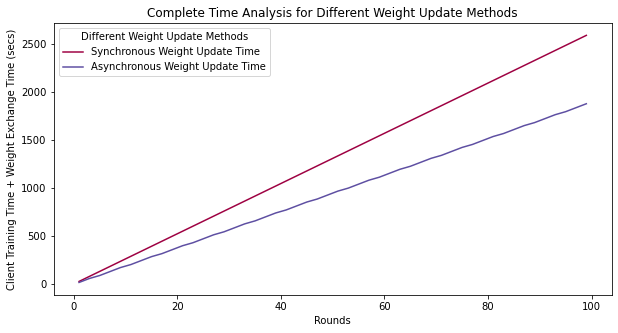

In [75]:
plt.rc('legend',fontsize=10) # using a size in points
fig,axs = plt.subplots(1,1,figsize = (10,5))   
tDf.plot(kind="line",y=["Synchronous Weight Update Time","Asynchronous Weight Update Time"] ,colormap="Spectral",rot=0,ax=axs,title="Complete Time Analysis for Different Weight Update Methods")
# plt.yscale("log")  
plt.xlabel("Rounds")
plt.ylabel("Client Training Time + Weight Exchange Time (secs)")
axs.get_legend().set_title("Different Weight Update Methods")
plt.savefig("time")

In [17]:
tDf.to_csv("time.csv")